In [4]:
import rasterio
import os
import numpy as np
from matplotlib import pyplot as plt

In [5]:
os.chdir(r'D:\Geospatial Data\Data\Liss3python\Band_1')

In [6]:
band = 'mosaiced_band_1.tif'
band1 = 'March 2014 Cliped liss4.tif'

In [7]:
img = rasterio.open(band)
os.chdir(r'D:\Geospatial Data\LISS 4 Paid\Clip')
img1 = rasterio.open(band1)

In [8]:
img.name

'mosaiced_band_1.tif'

In [6]:
img.width, img.height

(3373, 3373)

In [7]:
img.bounds

BoundingBox(left=72.9955, bottom=18.24550173761948, right=73.75449826238052, top=19.0045)

In [8]:
img.count

1

In [9]:
img.transform

Affine(0.00022502172024326086, 0.0, 72.9955,
       0.0, -0.00022502172024326086, 19.0045)

In [10]:
img.transform*(0,0)

(72.9955, 19.0045)

In [11]:
img.transform*(img.width, img.height)

(73.75449826238052, 18.24550173761948)

In [12]:
img.transform*(500,500)

(73.10801086012164, 18.89198913987837)

In [13]:
img.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

In [14]:
img.indexes

(1,)

In [15]:
img1.indexes

(1, 2, 3)

In [16]:
img1.count

3

In [17]:
band3  = img1.read(3)

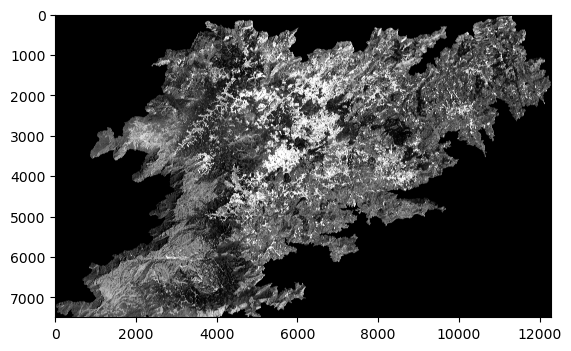

In [18]:
plt.imshow(img1.read(3), cmap = 'gray')

In [19]:
band3[4000,4000] # to get the value from the array

55

Spatial Indexing

In [20]:
#liss4 image is already in the projected coordinate system

In [21]:
x,y = (img1.bounds.left+5500, img1.bounds.top-3500)

In [22]:
row, col = img1.index(x,y)

In [23]:
row, col

(700, 1100)

In [24]:
img1.transform

Affine(5.0, 0.0, 652863.943083703,
       0.0, -5.0, 1275362.5)

In [25]:
band3[row, col]

0

In [26]:
row, col = img1.index(668326.943083703, 1271866.5)
row, col

(699, 3092)

In [27]:
band3[row,col]

0

In [28]:
img1.bounds.left+5500, img1.bounds.top-3500

(658363.943083703, 1271862.5)

In [29]:
img1.bounds

BoundingBox(left=652863.943083703, bottom=1237887.5, right=714293.943083703, top=1275362.5)

In [30]:
img1.xy(img1.width//2, img1.height//2)

(671601.443083703, 1244645.0)

In [31]:
img.xy(img.width//2,img.height//2)

(73.37499913119026, 18.625000868809742)

In [32]:
import numpy as np

In [33]:
x = np.linspace(-4.0, 4.0, 240)
y = np.linspace(-3.0, 3.0, 180)

In [34]:
X, Y = np.meshgrid(x, y)

In [35]:
Z1 = np.exp(-2 * np.log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1 ** 2*np.cos(X/1000))
Z2 = np.exp(-3 * np.log(2) * ((X + 0.5) ** 2 + (Y + 0.5) ** 2) / 2.5 ** 2*np.tan(X/200))
Z = 10.0 * (Z2 - Z1)

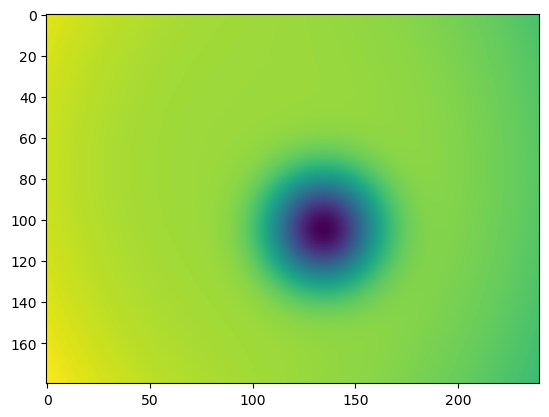

In [36]:
plt.imshow(Z)

#Masking the raster using shape file

In [2]:
import fiona
import rasterio.mask

In [18]:
with fiona.open(r"D:\Geospatial Data\Data\Admin Boundaries\nilgiri small square\nilgiri square shape projected.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

with rasterio.open(band1) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

In [19]:
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("RGB.byte.masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

In [20]:
a = rasterio.open('RGB.byte.masked.tif')

In [21]:
np.asarray(a.read(3))

array([[ 0, 46, 51, ...,  0,  0,  0],
       [ 0, 37, 46, ...,  0,  0,  0],
       [ 0, 37, 51, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

#Raterio - Color Interpretation

In [1]:
import rasterio
from matplotlib import pyplot as plt
fcc = rasterio.open(r'D:\Geospatial Data\Data\LISS 4\Haridwar_Apr_07_2024.tif')

In [2]:
fcc_array = fcc.read()

In [3]:
clip_array = fcc_array[:,4000:7500,7000:10500]

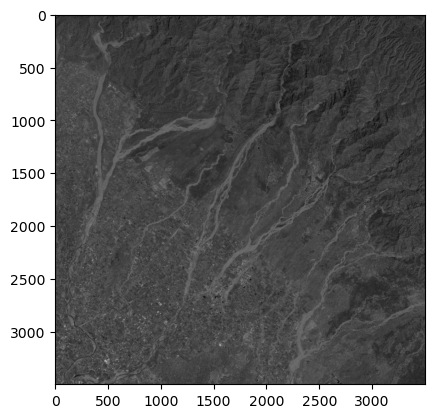

In [4]:
plt.imshow(clip_array[0],cmap = 'gray')

In [ ]:
fcc.transform*(0,0)

In [ ]:
img1.transform

In [ ]:
np.linspace((3,5,9))

In [ ]:
fcc.shape

In [8]:
from rasterio.plot import show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [40..553].


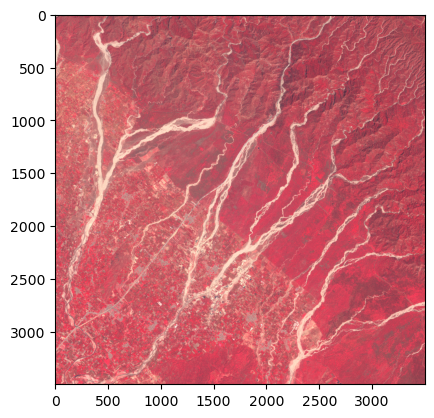

<Axes: >

In [9]:
show(clip_array)

In [48]:
new_dataset1 = rasterio.open(
    'liss_4_clippedd.tif',
    'w',driver='GTiff',
    height=clip_array.shape[0],
    width=clip_array.shape[1],
    count=3,
    dtype=clip_array.dtype,
    crs=fcc.crs,
    #transform=transform
)

In [6]:
clip_array.shape[0]

3

In [49]:
new_dataset1.write(clip_array[0], 1)
new_dataset1.write(clip_array[1], 2)
new_dataset1.write(clip_array[2], 3)

In [47]:
new_dataset1.close()

In [28]:
transform = Affine(5, 0.0, 500, 0.0,-5, 500.0)
transformer = rasterio.transform.AffineTransformer(transform)

In [27]:
transformer.xy(0, 0)

(502.5, 497.5)